# Code

## Basics

In [44]:
import fsspec

fs = fsspec.filesystem(
    's3', 
    anon=True, 
    endpoint_url='https://s3.waw3-1.cloudferro.com'
)

base_url = (
    "mdl-native-14/native/GLOBAL_ANALYSISFORECAST_PHY_001_024" \
    "/cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m_202406/2025/08"
)

url = fs.ls(base_url)[0]
url

'mdl-native-14/native/GLOBAL_ANALYSISFORECAST_PHY_001_024/cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m_202406/2025/08/glo12_rg_1d-m_20250801-20250801_3D-thetao_hcst_R20250813.nc'

## Data Access

In [42]:
import xarray as xr

with fs.open(url, mode="rb") as f:
    ds = xr.open_dataset(f, engine="h5netcdf")
ds

<xarray.Dataset> Size: 2GB
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 1)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 8B 2025-08-01T12:00:00
Data variables:
    thetao     (time, depth, latitude, longitude) float32 2GB ...
Attributes:
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    area:         Global
    Conventions:  CF-1.8
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    contact:      https://marine.copernicus.eu/contact
    references:   http://marine.copernicus.eu
    source:       MOI GLO12
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    institution:  Mercator Ocean International

## Visualisation

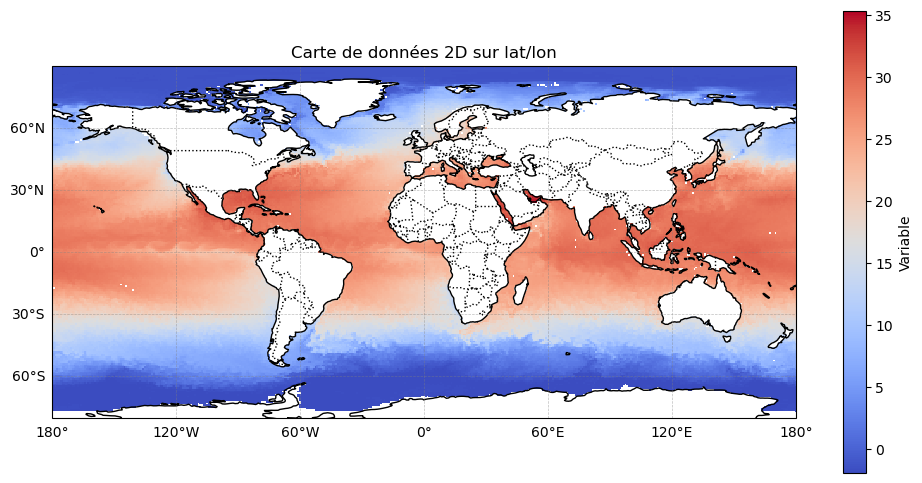

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lecture des données
with fs.open(url, mode="rb") as f:
    ds = xr.open_dataset(f, engine="h5netcdf").isel(depth=0, time=0)
    lats = ds['latitude'].values[::10]
    lons = ds['longitude'].values[::10]
    data = ds['thetao'].values[::10, ::10]

# Création d’une figure Cartopy
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Ajouter les côtes et frontières
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Optionnel : ajouter gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot des données
mesh = ax.pcolormesh(lons, lats, data, transform=ccrs.PlateCarree(), cmap='coolwarm')

# Ajouter une barre de couleur
plt.colorbar(mesh, ax=ax, orientation='vertical', label='Temperature')

plt.title("Carte de température")
plt.show()